In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')



In [6]:
df = pd.read_csv('Position_Salary.csv')

In [7]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,Head,10,1000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  12 non-null     object
 1   Level     12 non-null     int64 
 2   Salary    12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes


In [9]:
df.duplicated().sum()

0

In [16]:
from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder()


In [18]:
df['Position'].shape

(12,)

In [20]:
Encoder.fit_transform(df[['Position']]).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
# np.set_printoptions(linewidth=200) 
# from sklearn.compose import ColumnTransformer # one stroke transformation of X columns check above cell for X
# transformer = ColumnTransformer(transformers=[('Encoder',OneHotEncoder(),[0])],remainder='passthrough')
# X = transformer.fit_transform(x)


In [24]:
X = df[['Level']].values
Y = df[['Salary']].values

In [26]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,Head,10,1000000


<Axes: xlabel='Level', ylabel='Salary'>

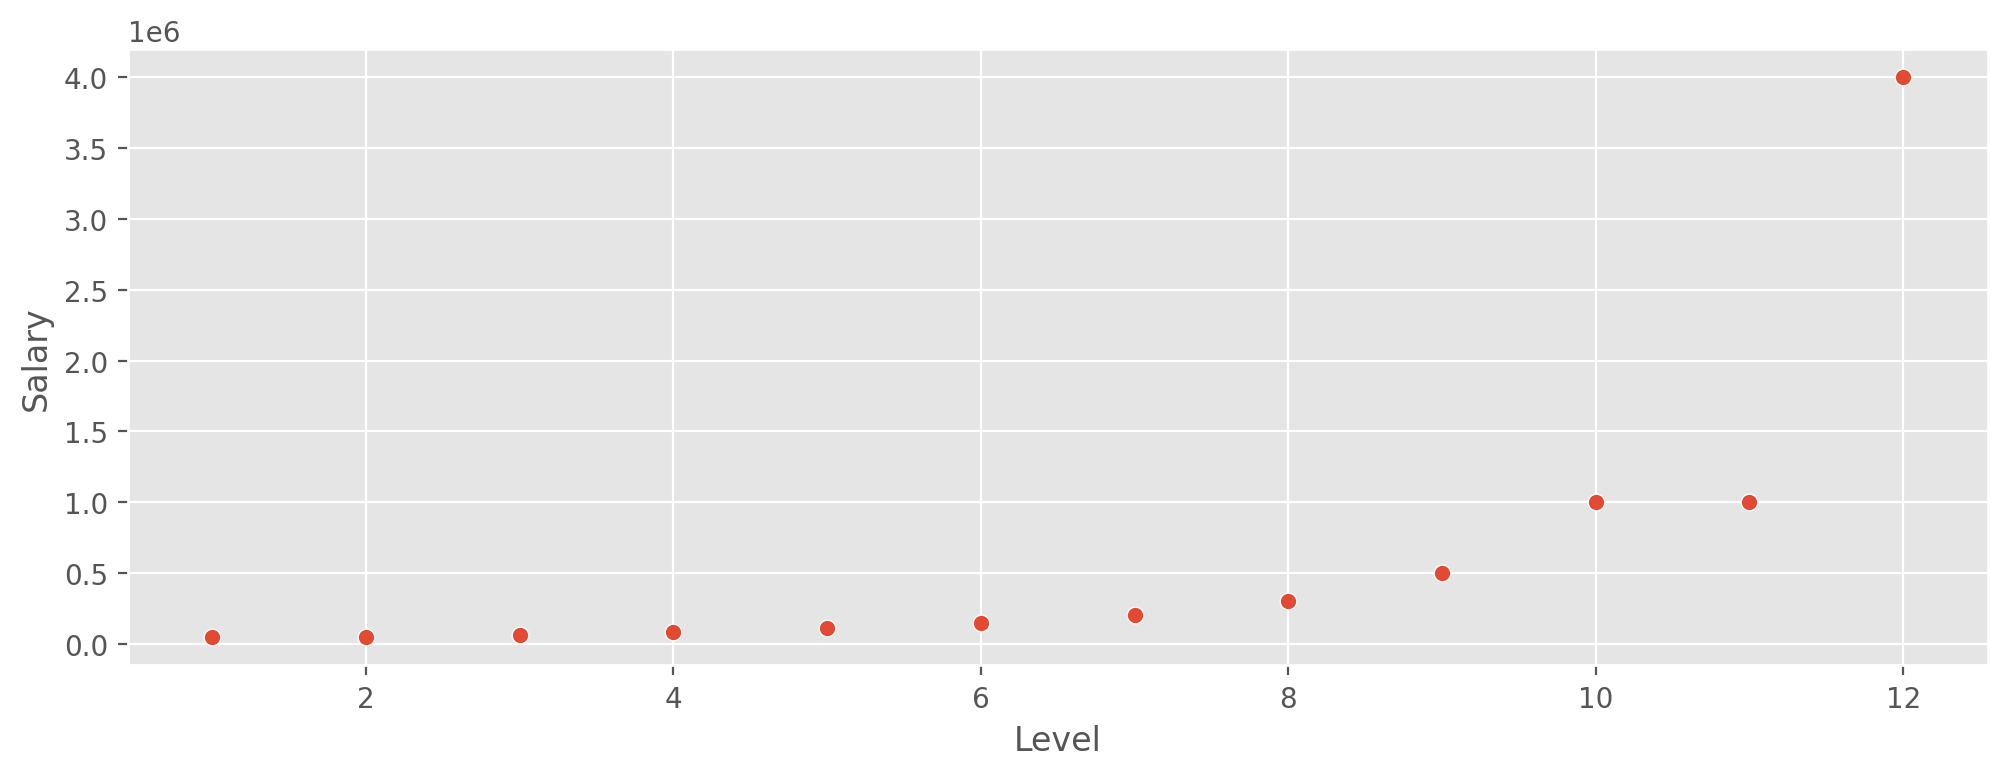

In [28]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x='Level',y='Salary',data =df)

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['Level']],df.Salary,test_size=0.4,random_state =5)

In [92]:
x_train.shape

(4, 1)

In [94]:
y_train.shape

(4,)

In [96]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression()

In [98]:
lr.predict(x_test)

array([[ 946375.29137529],
       [ 517319.34731935],
       [-126264.56876457],
       [1375431.23543124],
       [1804487.17948718],
       [ 302791.37529138],
       [1160903.26340326],
       [-340792.54079254]])

In [100]:
lr.score(X,Y)

0.4787054624217312

In [102]:
df3 = pd.read_csv('diabetes.csv')

In [104]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [106]:
X = df3[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = df3[['Outcome']]

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [110]:
x_train.shape

(691, 8)

In [112]:
y_train.shape

(691, 1)

In [114]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [116]:
lr.fit(x_train,y_train)

LogisticRegression()

In [118]:
lr.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [120]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
280,0,146,70,0,0,37.9,0.334,28
741,3,102,44,20,94,30.8,0.400,26
465,0,124,56,13,105,21.8,0.452,21
502,6,0,68,41,0,39.0,0.727,41
548,1,164,82,43,67,32.8,0.341,50
...,...,...,...,...,...,...,...,...
600,1,108,88,19,0,27.1,0.400,24
61,8,133,72,0,0,32.9,0.270,39
86,13,106,72,54,0,36.6,0.178,45
398,3,82,70,0,0,21.1,0.389,25


In [122]:
y_test

,Outcome
280,1
741,0
465,0
502,1
548,0
...,...
600,0
61,1
86,0
398,0


In [124]:
lr.score(x_test,y_test)

0.7792207792207793

In [385]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4)

In [465]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)

In [467]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [469]:
knn.score(x_test,y_test)

0.7435064935064936